# A/B Testing

An A/B test is a randomized, controlled experiment in which the performance of two product variants are compared. Those variants are usually called A and B. From a business perspective we want to know if the performance of a certain variant outperforms the other, thus helping the business to achieve more effectively its goals (i.e. increasing conversions, etc).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A/B-Testing" data-toc-modified-id="A/B-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A/B Testing</a></span><ul class="toc-item"><li><span><a href="#Generating-data" data-toc-modified-id="Generating-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generating data</a></span></li></ul></li><li><span><a href="#Udacity---Google-course" data-toc-modified-id="Udacity---Google-course-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Udacity - Google course</a></span><ul class="toc-item"><li><span><a href="#Frequentist-A/B-testing" data-toc-modified-id="Frequentist-A/B-testing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Frequentist A/B testing</a></span></li><li><span><a href="#Bayesian-approach-to-A/B-testing" data-toc-modified-id="Bayesian-approach-to-A/B-testing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bayesian approach to A/B testing</a></span></li></ul></li></ul></div>

## Generating data

In [1]:
# Loading the needed libraries
from scipy.stats import bernoulli, binom, beta
import numpy as np
from AB_Tester import ABTester
# Plot libraries and settings
import matplotlib.pyplot as plt
import seaborn as sns
from Plots import count_plot  # custom made plots
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style('dark')
# Re-load modules 
%load_ext autoreload
%autoreload 2

In [2]:
A = dict(impressions=16500, conversions=30)   # A := control group
B = dict(impressions=17000, conversions=50)   # B := test group

Create the Beta functions for the two sets

In [3]:
# True values (unknown for the A/B Test)
A_true_cr = 0.1
B_true_cr = 0.12
A_size = 2500
B_size = 1500

# Generate data: sample N Bernoulli random variates, each random variate has 0.05 chance of being 1
A_occurrences = bernoulli.rvs(A_true_cr, size=A_size)  
B_occurrences = bernoulli.rvs(B_true_cr, size=B_size)  

print(A_occurrences[:20]) 
print(np.sum(A_occurrences))

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
253


Observed frequency in Group A: 10.12%
Observed frequency in Group B: 12.80%
Does this equal the true frequency? False


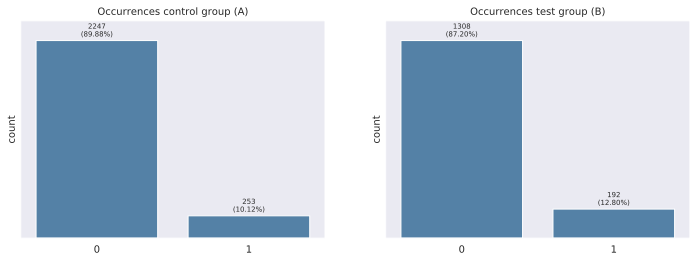

In [8]:
# Occurrences.mean is equal to n/N.
print(f"Observed frequency in Group A: {np.mean(A_occurrences):.2%}")
print(f"Observed frequency in Group B: {np.mean(B_occurrences):.2%}")
print("Does this equal the true frequency? %s" % (np.mean(A_occurrences) == A_true_cr))

plot, axes = plt.subplots(1, 2, figsize=(12, 4))
count_plot(A_occurrences, title='Occurrences control group (A)', ax=axes[0], show=False)
count_plot(B_occurrences, title='Occurrences test group (B)', ax=axes[1], show=False)
plt.show()

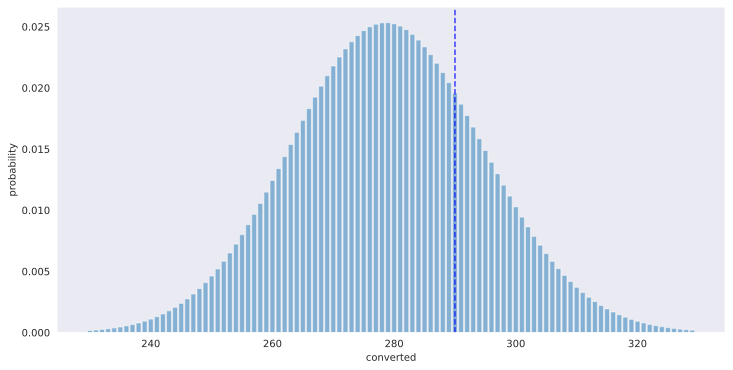

In [6]:
# .................
A_total = len(A_occurrences)
A_cr = sum(A_occurrences) / A_total
B_cr = sum(B_occurrences) / len(B_occurrences)
A_converted = A_total * A_cr
# .................
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(A_converted-49, A_converted+50, 100)
y = binom(A_total, A_cr).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=B_cr * A_total, c='blue', alpha=0.75, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')
plt.show()

Text(0, 0.5, 'probability')

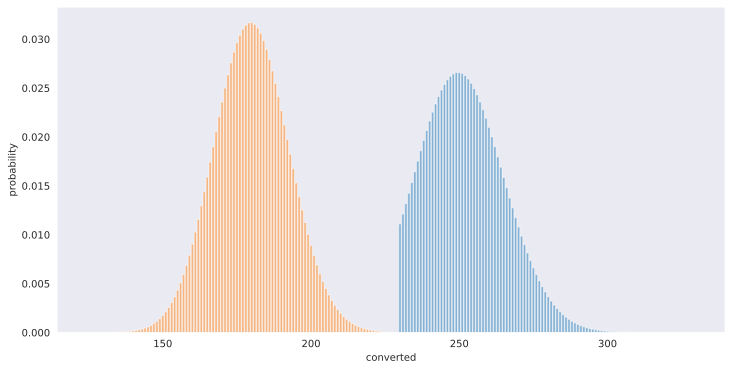

In [13]:
# .................
A_total = len(A_occurrences)
A_cr = sum(A_occurrences) / A_total

B_total = len(B_occurrences)
B_cr = sum(B_occurrences) / len(B_occurrences)
B_converted = B_total * B_cr
# .................
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(A_converted-49, A_converted+50, 100)
yA = binom(A_total, A_true_cr).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
xB = np.linspace(B_converted-49, B_converted+50, 100)
yB = binom(B_total, B_true_cr).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('converted')
plt.ylabel('probability')

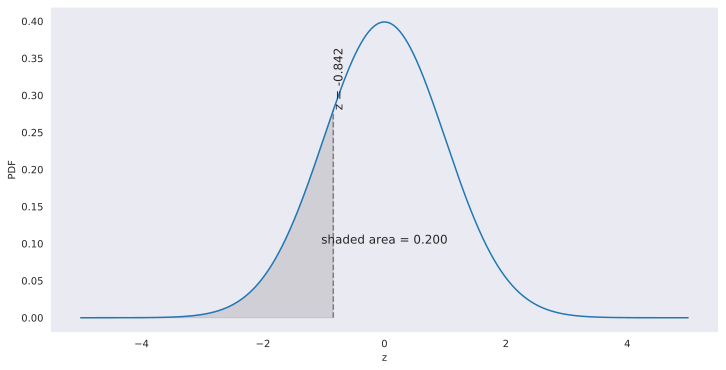

In [241]:
zplot(area=0.2, two_tailed=False, align_right=False)

# Udacity - Google course

In [31]:
A = dict(impressions=10072, conversions=974)   # A := control group
B = dict(impressions=9886, conversions=1242)   # B := test group
abtester = ABTester(A, B, significance=0.05, power=0.8)

In [32]:
p_hat, conf_int = abtester.get_variant_confidence_interval(variant='A')

p_hat: 0.10, z: 1.96, margin of error: 0.006
Confidence interval: (0.091, 0.102)


In [33]:
sample_size1 = abtester.get_sample_size1(min_detectable_effect=0.2)

A minimum sample size of 3760 is needed                     
  to detect a change of 20% of a base CTR of 10%                     
  with a power of 80%


In [34]:
sample_size2 = abtester.get_sample_size2(min_detectable_effect=0.2)

A minimum sample size of 3981 is needed                         
  to detect a change of 20% of a base CTR of 10%                         
  with a power of 80%


In [35]:
sample_size3 = abtester.get_sample_size3(min_detectable_effect=0.2)
print(sample_size3, abtester.__dict__)

37.305197898937685 {'A': {'impressions': 10072, 'conversions': 974, 'p_hat': 0.09670373312152503}, 'B': {'impressions': 9886, 'conversions': 1242, 'p_hat': 0.12563220716164272}, 'significance': 0.05, 'power': 0.8, 'two_sided': True, 'AB_stats': Stats(d_hat=0.028928474040117697, pooled_prob=0.11103316965627819, pooled_se=0.004447945883692886, confidence_interval=(0.020210660302896453, 0.037646287777338944), p_value=4.2970545855987543e-19)}


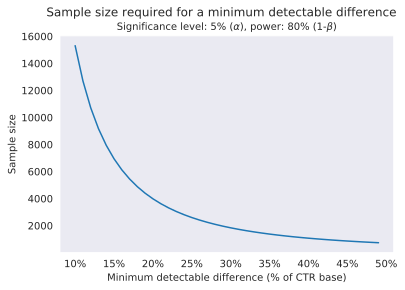

In [36]:
abtester.plot_sample_size_vs_diff(min_diff=0.1, max_diff=0.5, step_diff=0.01)

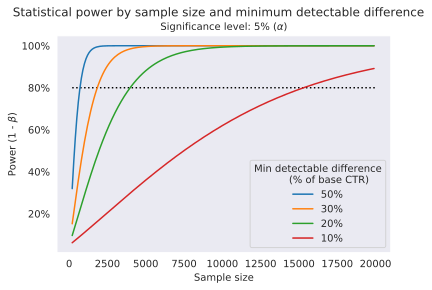

In [8]:
abtester.plot_power_vs_sample_size(min_sample_size=200, max_sample_size=20000, step_sample_size=100,
                                   min_diffs=[0.1, 0.2, 0.3, 0.5])

In [43]:
abtester.print_AB_results()
pool_prob, pooled_se, conf_interval = abtester.get_ab_test_stats()


Estimated difference, d_hat: 0.028928474040117697
Confidence interval: (2.02%, 3.76%)


{'A': {'impressions': 10072, 'conversions': 974, 'p_hat': 0.09670373312152503}, 'B': {'impressions': 9886, 'conversions': 1242, 'p_hat': 0.12563220716164272}, 'significance': 0.05, 'power': 0.8, 'two_sided': True, 'AB_stats': Stats(d_hat=0.028928474040117697, pooled_prob=0.11103316965627819, pooled_se=0.004447945883692886, confidence_interval=(0.020210660302896453, 0.037646287777338944), p_value=4.2970545855987543e-19)}
Stats(d_hat=0.028928474040117697, pooled_prob=0.11103316965627819, pooled_se=0.004447945883692886, confidence_interval=(0.020210660302896453, 0.037646287777338944), p_value=4.2970545855987543e-19)


AttributeError: 'ABTester' object has no attribute 'get_ab_test_stats'

As the lower bound of the confidence interval (2.02%) is greater than the min expected change: 2%, which means practical significance, and we also reached statistical significance ()

Conclusion: it is highly probable that the CTR was improved by at least 2%, with a 95% confidence level. It would be recommended to launch the new version (B).

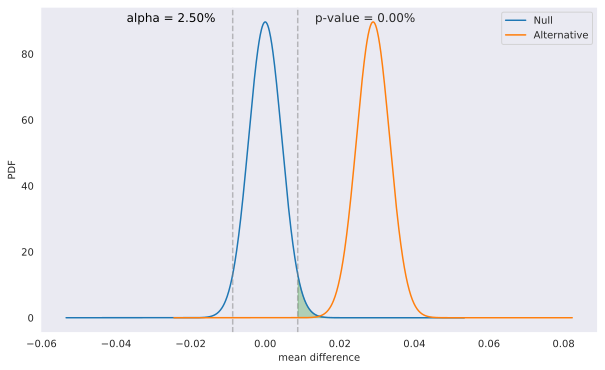

In [147]:
abtester.AB_plot(show='alpha')  # show: (str) Options: power, alpha, beta, p-value, or None '''

## Frequentist A/B testing

## Bayesian approach to A/B testing